<a href="https://colab.research.google.com/github/DrDAN6770/ccClub_2023/blob/main/ccClub%20Judge/Problem%20List/ccClub_2023_Spring_%E8%AE%80%E6%9B%B8%E6%9C%83_Week_7_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#數字串列處理器

---


Description

在之前的練習中，我們實作過「奇偶個數差(odd_even_count_sub)」、「冠亞軍分數差(top2_max_sub)」和「最大奇偶相差(max_odd_even_sub)」。

現在，我們需要實作一個數字串列處理器，這個處理器擁有以上三個功能。

讓使用者輸入若干個數以及需要的功能，接著輸出對應的結果。



In [ ]:
def odd_even_count_sub(lst):
    count_odd = sum(1 for num in lst if num & 1)
    ans = abs(len(lst) - count_odd - count_odd)
    return ans

def top2_max_sub(lst):
    lst.sort()
    ans = lst[-1] - lst[-2]
    return ans

def max_odd_even_sub(lst):
    maxodd = max([num for num in lst if num & 1], default = 0)
    maxeven = max([num for num in lst if not num & 1], default = 0)
    ans = abs(maxodd - maxeven)
    return ans

# 10-2：自訂費式數列

---


Description

已知 f(0) = 0，f(1) = 1，f(2) = 2，f(n) = f(n-1) + f(n-2) + f(n-3)。輸入數字 n ，輸出 f(n)。


Input
輸入為一行，包含一個正整數n


Output
請輸出f(n)

In [ ]:
def f(n):
  if n == 0:return 0
  elif n == 1 :return 1
  elif n == 2 :return 2
  else:
    d = [0,1,2] + [0]*(n-2)
    for i in range(3,n+1):
      d[i] = d[i-1] + d[i-2] + d[i-3]
    return d[n]
n = int(input())
print(f(n))

# 數字組合最大值排序

---


Description

給定數個整數，請使用數字各位數重新排列以後，可以排出來的最大值來進行排序，並將排序後的串列直接輸出。


Input
輸入為一行，包含數個整數


Output


In [ ]:
def num_max_sorted(nums):
    num_max_dict = {}
    for num in nums:
        num_max_dict[num] = int(''.join(sorted(list(num), reverse = True)))
    return sorted(nums, key = lambda x:num_max_dict[x])

nums = input().split()
res = num_max_sorted(nums)
print(res)

63852 58948 48046 61850 21209 68169 14761
['14761', '48046', '61850', '63852', '21209', '68169', '58948']


# 數字交換最大值

---


Description

給定一個非負整數 N，你可以將任兩個位數的值交換。

請寫一個程式，計算出應該怎樣交換能使交換後的數字最大。


Input
輸入有一行，包含一個非負整數 N。


Output
輸出有一行，包含一個非負整數。

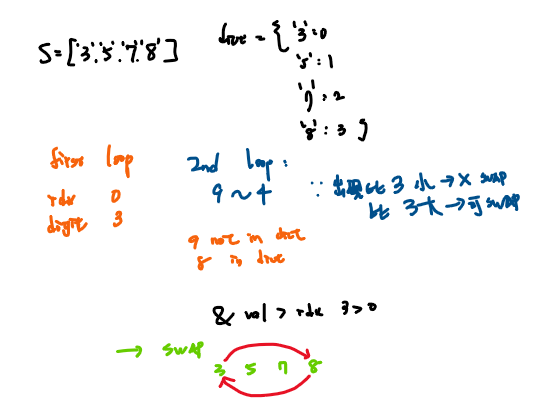

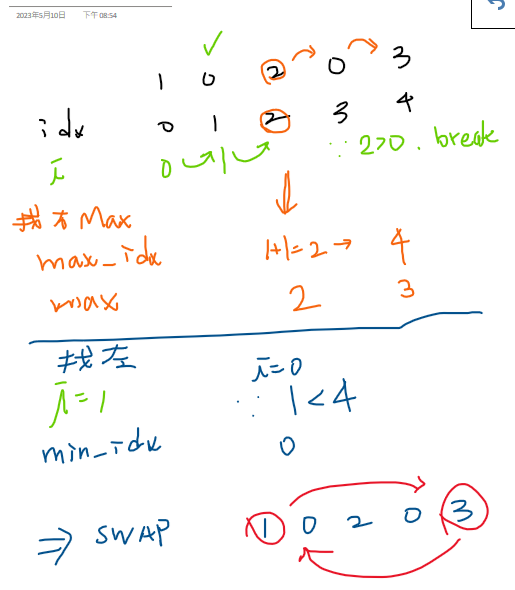

In [ ]:
def swap_nums(num):
    s = list(num)
    n = len(s)

    # 降序排列回傳原數字，右邊>左邊 代表有可交換的組合
    for i in range(n - 1):
        if s[i] < s[i + 1]:
            break
    else:
        return int(num)
    
    # 目前最大index、value (能走到這代表前面break，代表i後面值比較大)
    max_idx, max_val = i + 1, s[i + 1]

    # 接著找右邊最大的值、index
    for j in range(i + 1, n):
        if max_val <= s[j]:
            max_idx, max_val = j, s[j]

    # 往左找最小的index
    left_idx = i
    for j in range(i, -1, -1):
        if s[j] < max_val:
            left_idx = j

    # Swap
    s[max_idx], s[left_idx] = s[left_idx], s[max_idx]
    return int(''.join(s))

num = input()
res = swap_nums(num)
print(res)

10203
30201


In [22]:
# def swap_nums(num:str) -> int:
def swap_nums2(num):
  s = list(num)

  # 存字典 {'3':0, '5':1, '7':2, '8':3}
  hash_map = {digit : idx for idx, digit in enumerate(s)}

  # 遍歷字典，從最大數字9開始往下找到現在數字前一個 ex: 現在3 找到4就可以swap，不需要往下找
  for idx, digit in enumerate(s):
    for number in range(9, int(digit), -1):
      temp_str = str(number)

      # 這個數在字典且所在idx比現在大(代表在右邊)
      if temp_str in hash_map and hash_map[temp_str] > idx:
        s[idx], s[hash_map[temp_str]] = s[hash_map[temp_str]], s[idx]
        return int(''.join(s))
  
  # 沒有swap,代表已是最大
  return int(num)
num = input()
res = swap_nums2(num)
print(res)

1021
2011


In [31]:
def swap_nums3(num):
  # 雙指針
  l = -1
  r = -1
  max_idx = -1
  max_val = '' # '9' > '' True
  n = len(num)

  # 找最大值 & index 以及找 小於當下最大值
  for i in range(n - 1, -1, -1):
    if num[i] > max_val:
      max_idx , max_val = i, num[i]
    elif num[i] < max_val:
      l , r = i , max_idx

  # l、r沒變動表示沒swap
  if l == -1:
    return int(num)
  else:
    num = list(num)
    num[l], num[r] = num[r], num[l]
    return ''.join(num)

num = input()
res = swap_nums3(num)
print(res)

7369
9367
